In [1]:
# import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import linkage, dendrogram
from sklearn.cluster import DBSCAN
from sklearn.neighbors import NearestNeighbors
from sklearn.metrics import silhouette_score, davies_bouldin_score
from sklearn.impute import KNNImputer
from sklearn.preprocessing import PowerTransformer, StandardScaler
from sklearn.neighbors import LocalOutlierFactor
from umap import UMAP
from sklearn.cluster import KMeans




In [2]:
# load the data and display the first 5 rows
df = pd.read_csv('cc_dataset.csv')
df.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [3]:
# Display the dataset's dimensions
print(df.shape)


(8950, 18)


In [4]:
# Show summary information about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

In [5]:
# Generate statistical summary of the dataset
df.describe()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
count,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8949.000000,8950.000000,8637.000000,8950.000000,8950.000000
mean,1564.474828,0.877271,1003.204834,592.437371,411.067645,978.871112,0.490351,0.202458,0.364437,0.135144,3.248827,14.709832,4494.449450,1733.143852,864.206542,0.153715,11.517318
std,2081.531879,0.236904,2136.634782,1659.887917,904.338115,2097.163877,0.401371,0.298336,0.397448,0.200121,6.824647,24.857649,3638.815725,2895.063757,2372.446607,0.292499,1.338331
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.000000,0.019163,0.000000,6.000000
25%,128.281915,0.888889,39.635000,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,1.000000,1600.000000,383.276166,169.123707,0.000000,12.000000
50%,873.385231,1.000000,361.280000,38.000000,89.000000,0.000000,0.500000,0.083333,0.166667,0.000000,0.000000,7.000000,3000.000000,856.901546,312.343947,0.000000,12.000000
75%,2054.140036,1.000000,1110.130000,577.405000,468.637500,1113.821139,0.916667,0.300000,0.750000,0.222222,4.000000,17.000000,6500.000000,1901.134317,825.485459,0.142857,12.000000
max,19043.138560,1.000000,49039.570000,40761.250000,22500.000000,47137.211760,1.000000,1.000000,1.000000,1.500000,123.000000,358.000000,30000.000000,50721.483360,76406.207520,1.000000,12.000000


In [6]:
# Check the number of missing values in each column

missing = df.isnull().sum()
print("Missing values per column:\n", missing)



Missing values per column:
 CUST_ID                               0
BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64


In [7]:
# Count the number of duplicate rows 
df.duplicated().sum()  


0

In [8]:
# Count the number of unique values in each column
df.nunique()


CUST_ID                             8950
BALANCE                             8871
BALANCE_FREQUENCY                     43
PURCHASES                           6203
ONEOFF_PURCHASES                    4014
INSTALLMENTS_PURCHASES              4452
CASH_ADVANCE                        4323
PURCHASES_FREQUENCY                   47
ONEOFF_PURCHASES_FREQUENCY            47
PURCHASES_INSTALLMENTS_FREQUENCY      47
CASH_ADVANCE_FREQUENCY                54
CASH_ADVANCE_TRX                      65
PURCHASES_TRX                        173
CREDIT_LIMIT                         205
PAYMENTS                            8711
MINIMUM_PAYMENTS                    8636
PRC_FULL_PAYMENT                      47
TENURE                                 7
dtype: int64

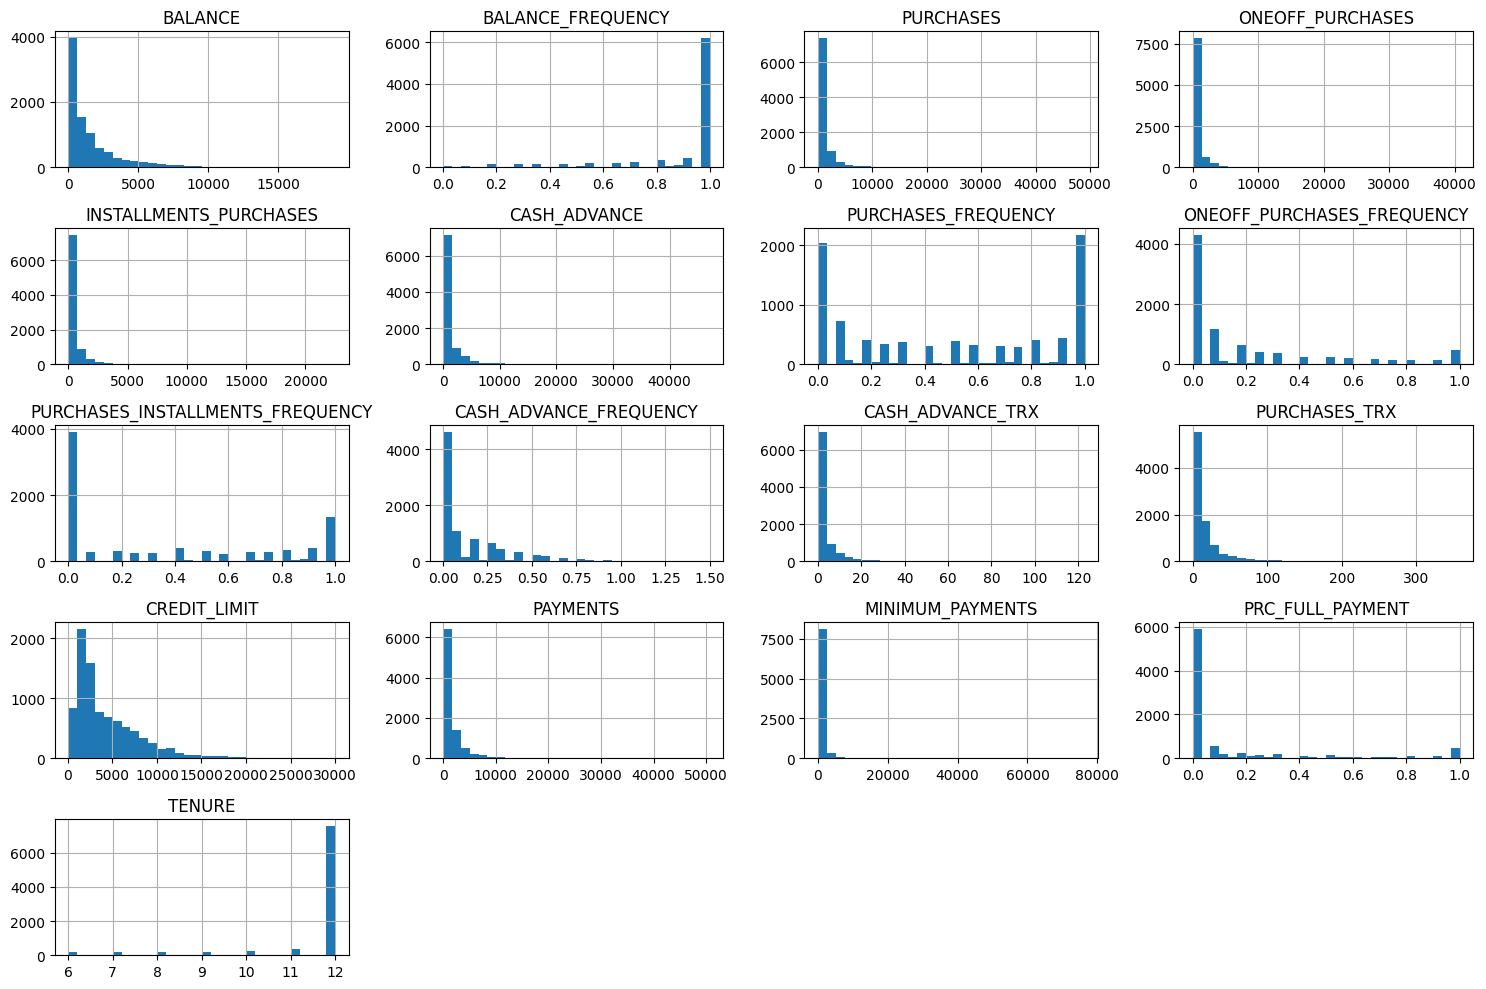

In [9]:
# Distribution of each feature
df.hist(figsize=(15, 10), bins=30)
plt.tight_layout()
plt.show()


In [10]:
df.drop('CUST_ID', axis=1, inplace=True)

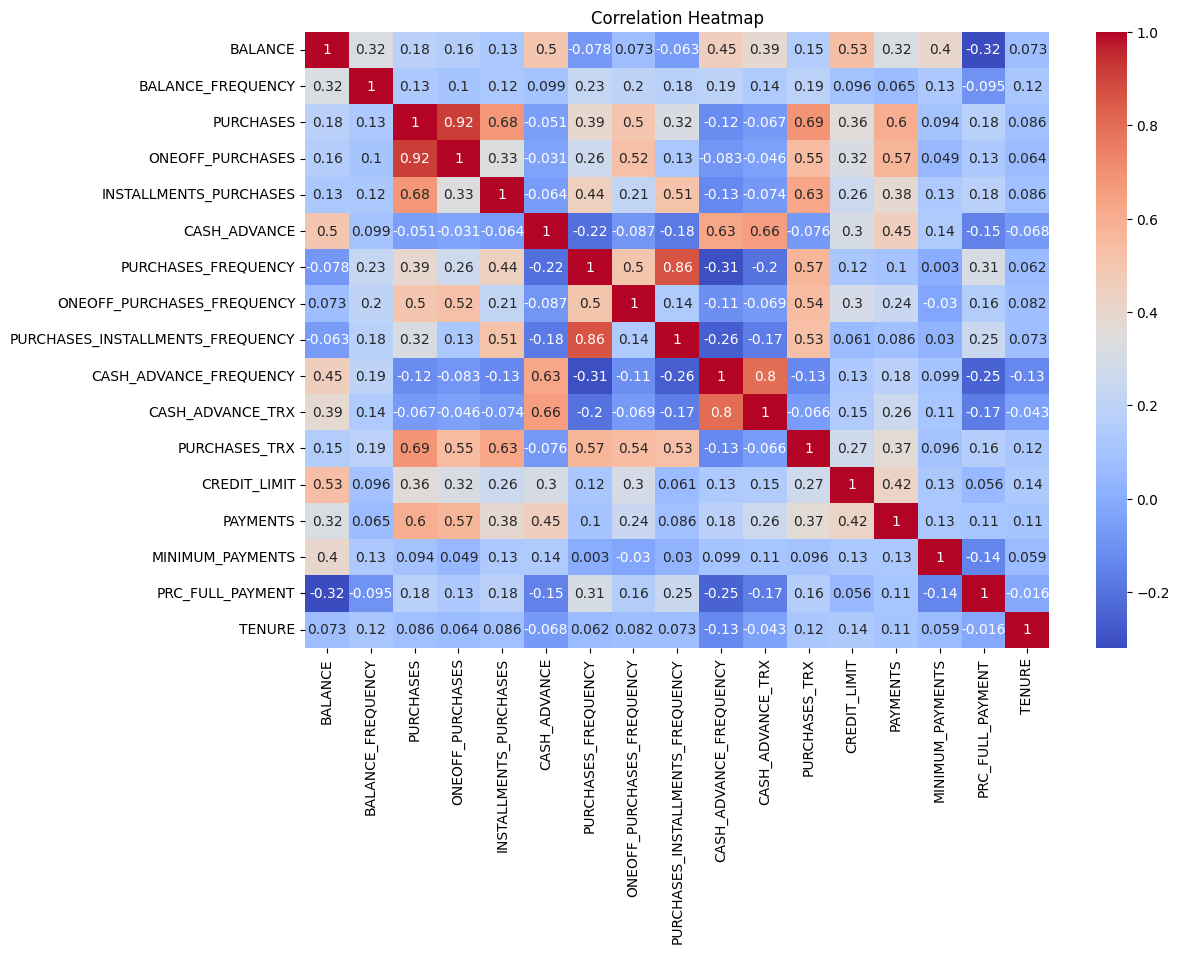

In [11]:
# Correlation heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()

In [12]:
# Impute missing values
imputer = KNNImputer(n_neighbors=5)
numeric_cols = df.select_dtypes(include=[np.number]).columns
df_imputed = pd.DataFrame(imputer.fit_transform(df[numeric_cols]), columns=numeric_cols)

if 'CUST_ID' in df_imputed.columns:
    df_imputed.drop('CUST_ID', axis=1, inplace=True)

df = df_imputed.copy()


In [13]:

# OUTLIER REMOVAL USING LOF
lof = LocalOutlierFactor(n_neighbors=20, contamination=0.05)
outlier_labels = lof.fit_predict(df)
df = df[outlier_labels == 1]  # keep only inliers

In [14]:
# FEATURE ENGINEERING 
df['BALANCE_TO_LIMIT'] = df['BALANCE'] / (df['CREDIT_LIMIT'] + 1e-6)
df['PAYMENT_UTILIZATION'] = df['PAYMENTS'] / (df['BALANCE'] + 1e-6)
df['PURCHASE_INTENSITY'] = df['PURCHASES'] * df['PURCHASES_FREQUENCY']
df['CASH_ADVANCE_FREQUENCY'] = df['CASH_ADVANCE_TRX'] / (df['PURCHASES_TRX'] + 1e-6)


In [15]:
# REMOVE HIGHLY CORRELATED FEATURES
corr_matrix = df.corr().abs()
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))
to_drop = [column for column in upper.columns if any(upper[column] > 0.95)]
df.drop(columns=to_drop, inplace=True)


In [16]:

# TRANSFORMATION & SCALING
pt = PowerTransformer(method='yeo-johnson')
df_transformed = pd.DataFrame(pt.fit_transform(df), columns=df.columns)

scaler = StandardScaler()
scaled_df = pd.DataFrame(scaler.fit_transform(df_transformed), columns=df.columns)


In [17]:
# DIMENSIONALITY REDUCTION
# PCA
pca = PCA(n_components=0.95, random_state=42)
pca_data = pca.fit_transform(scaled_df)
# UMAP
umap = UMAP(n_components=10, random_state=42, n_neighbors=30, min_dist=0.05)
umap_data = umap.fit_transform(pca_data)

c:\Users\habib\AppData\Local\Programs\Python\Python312\Lib\site-packages\umap\umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


In [18]:
# K-MEANS CLUSTERING
silhouette_scores = []
inertias = []

print("\nEvaluating KMeans with Silhouette Score:")
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, init='k-means++', n_init=50, algorithm='elkan', random_state=42)
    kmeans.fit(umap_data)
    labels = kmeans.labels_
    inertia = kmeans.inertia_
    sil_score = silhouette_score(umap_data, labels)
    
    inertias.append(inertia)
    silhouette_scores.append(sil_score)
    
    print(f"K={k} | Silhouette Score: {sil_score:.4f}")


Evaluating KMeans with Silhouette Score:
K=2 | Silhouette Score: 0.4705
K=3 | Silhouette Score: 0.5563
K=4 | Silhouette Score: 0.6770
K=5 | Silhouette Score: 0.7363
K=6 | Silhouette Score: 0.7765
K=7 | Silhouette Score: 0.6836
K=8 | Silhouette Score: 0.6483
K=9 | Silhouette Score: 0.6270
K=10 | Silhouette Score: 0.6535


In [19]:
# Choose best K 
best_k = np.argmax(silhouette_scores) + 2 
final_kmeans = KMeans(n_clusters=best_k, init='k-means++', n_init=50, algorithm='elkan', random_state=42)
final_kmeans.fit(umap_data)
scaled_df['CLUSTER'] = final_kmeans.labels_

print(f"\n Best K: {best_k} with Silhouette Score: {silhouette_scores[best_k - 2]:.4f}")


 Best K: 6 with Silhouette Score: 0.7765


C:\Users\habib\AppData\Local\Temp\ipykernel_26432\1113227666.py:3: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "bo-" (-> marker='o'). The keyword argument will take precedence.
  plt.plot(range(2, 11), inertias, 'bo-', linewidth=2, marker='o')


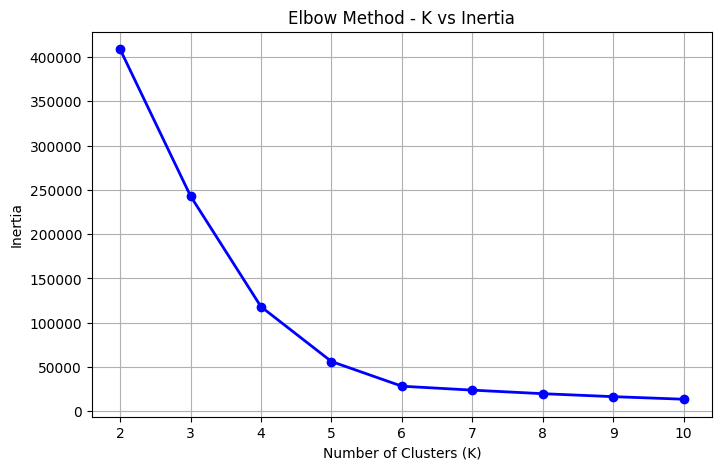

In [20]:
# PLOT ELBOW CURVE
plt.figure(figsize=(8, 5))
plt.plot(range(2, 11), inertias, 'bo-', linewidth=2, marker='o')
plt.title('Elbow Method - K vs Inertia')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Inertia')
plt.grid(True)
plt.xticks(range(2, 11))
plt.show()

c:\Users\habib\AppData\Local\Programs\Python\Python312\Lib\site-packages\umap\umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


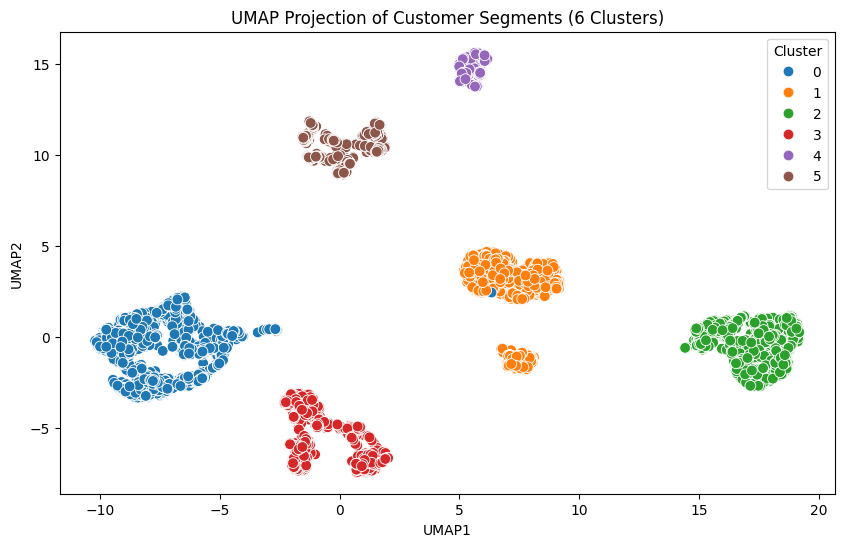

In [21]:
# Reduce UMAP to 2D for visualization 
umap_2d = UMAP(n_components=2, random_state=42, n_neighbors=30, min_dist=0.05)
umap_2d_data = umap_2d.fit_transform(pca_data)

# Add cluster labels to DataFrame
cluster_labels = final_kmeans.labels_
plot_df = pd.DataFrame(umap_2d_data, columns=["UMAP1", "UMAP2"])
plot_df['Cluster'] = cluster_labels

# Plot UMAP clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(data=plot_df, x='UMAP1', y='UMAP2', hue='Cluster', palette='tab10', s=60)
plt.title("UMAP Projection of Customer Segments (6 Clusters)")
plt.legend(title='Cluster')
plt.show()


C:\Users\habib\AppData\Local\Temp\ipykernel_26432\2503930990.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=cluster_counts.index, y=cluster_counts.values, palette='tab10')


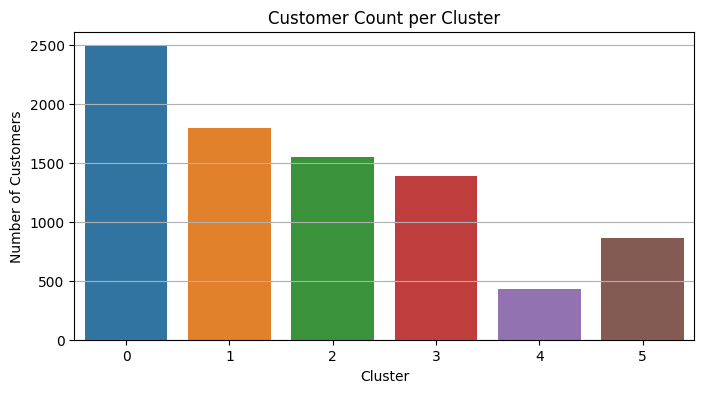

In [22]:
# customers per cluster
cluster_counts = scaled_df['CLUSTER'].value_counts().sort_index()

plt.figure(figsize=(8, 4))
sns.barplot(x=cluster_counts.index, y=cluster_counts.values, palette='tab10')
plt.xlabel('Cluster')
plt.ylabel('Number of Customers')
plt.title('Customer Count per Cluster')
plt.grid(axis='y')
plt.show()


Top 5 features with highest variation across clusters: ['TENURE', 'CASH_ADVANCE_FREQUENCY', 'PURCHASES', 'CASH_ADVANCE', 'CASH_ADVANCE_TRX']


C:\Users\habib\AppData\Local\Temp\ipykernel_26432\3115393807.py:38: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(top_features, rotation=45, ha='right')
C:\Users\habib\AppData\Local\Temp\ipykernel_26432\3115393807.py:38: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(top_features, rotation=45, ha='right')
C:\Users\habib\AppData\Local\Temp\ipykernel_26432\3115393807.py:38: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(top_features, rotation=45, ha='right')
C:\Users\habib\AppData\Local\Temp\ipykernel_26432\3115393807.py:38: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(top_features, r

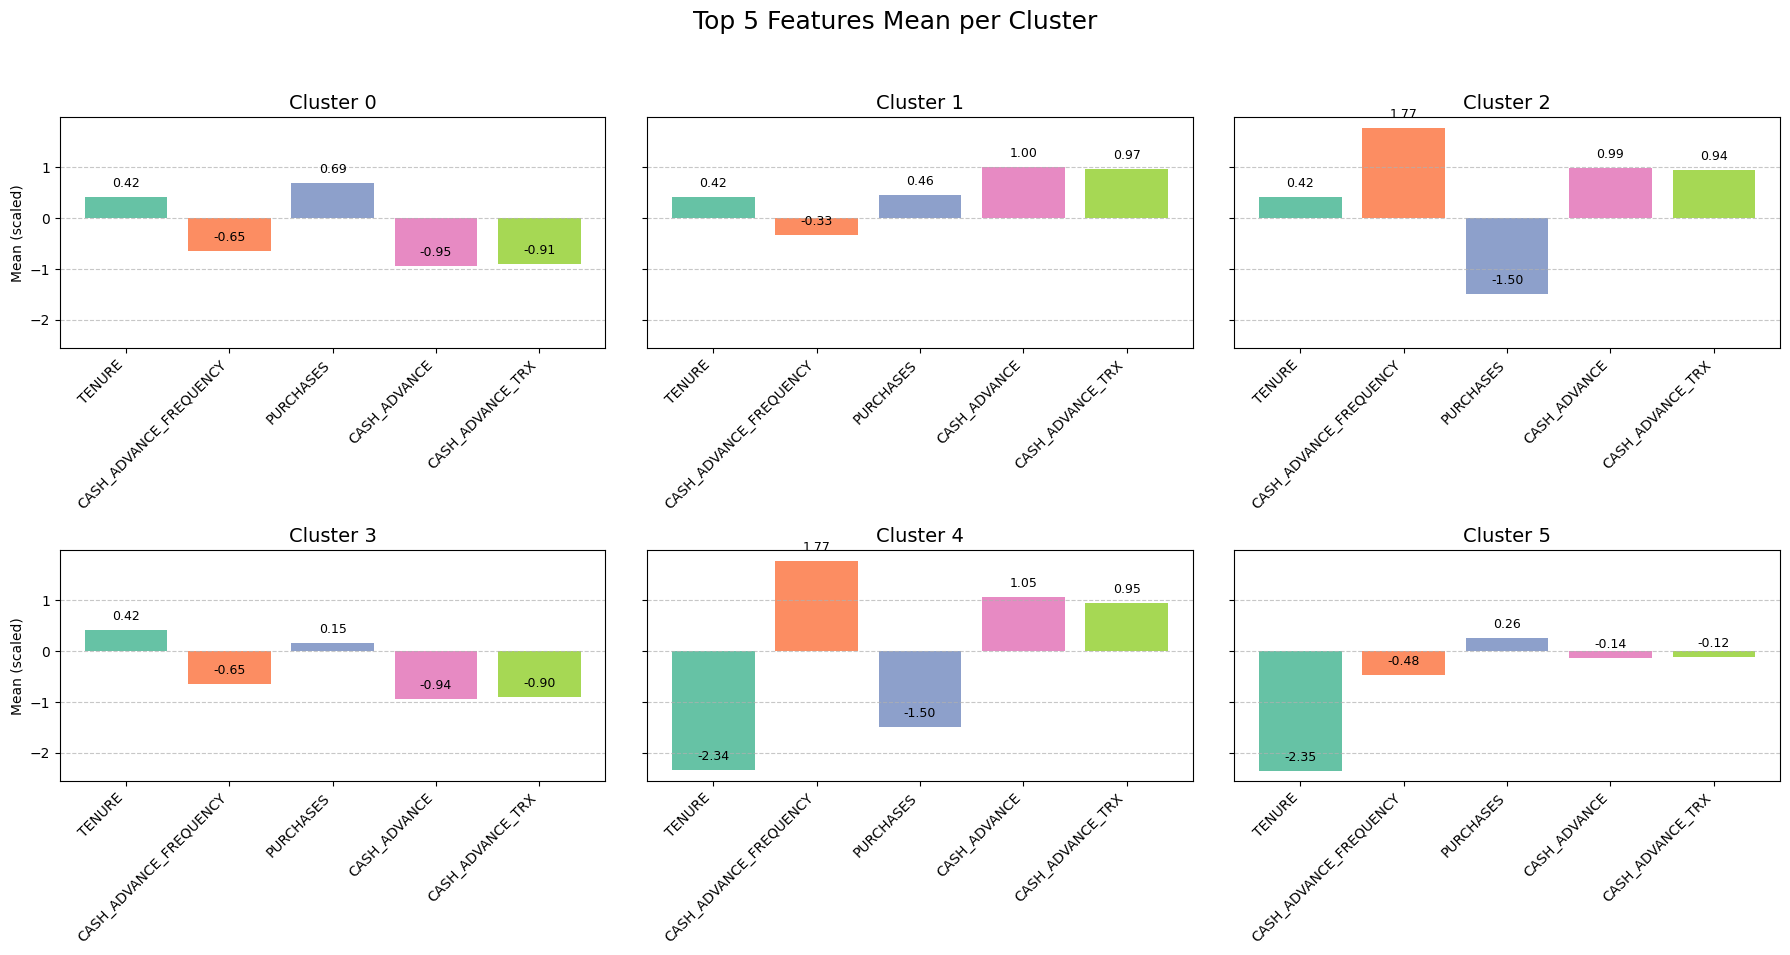

In [23]:
# Explore features with highest variance across clusters

# Calculate mean of each feature per cluster
cluster_means = scaled_df.groupby('CLUSTER').mean()

# Calculate variance across clusters for each feature's mean
feature_variance = cluster_means.var().sort_values(ascending=False)

# Select top 5 features with largest variance
top_features = feature_variance.head(5).index.tolist()
print("Top 5 features with highest variation across clusters:", top_features)

# Plot bar plots for each cluster
fig, axes = plt.subplots(2, 3, figsize=(18, 10), sharey=True)
colors = sns.color_palette("Set2", len(top_features))  

for i, cluster_num in enumerate(sorted(cluster_means.index)):
    ax = axes[i // 3, i % 3]
    
    # Extract the means for the top features for this cluster
    means = cluster_means.loc[cluster_num, top_features]
    
    # Draw barplot
    bars = ax.bar(top_features, means, color=colors)
    
    # Annotate bars with mean values rounded
    for bar in bars:
        height = bar.get_height()
        ax.annotate(f'{height:.2f}',
                    xy=(bar.get_x() + bar.get_width() / 2, height),
                    xytext=(0, 5),
                    textcoords="offset points",
                    ha='center', va='bottom', fontsize=9)
    
    ax.set_title(f'Cluster {cluster_num}', fontsize=14)
    ax.set_xlabel('')
    ax.set_ylabel('Mean (scaled)' if i % 3 == 0 else '')
    ax.set_xticklabels(top_features, rotation=45, ha='right')
    ax.grid(axis='y', linestyle='--', alpha=0.7)

plt.suptitle('Top 5 Features Mean per Cluster', fontsize=18)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()


In [24]:
def generate_cluster_profiles(data, cluster_col='CLUSTER', top_n=3):

    feature_data = data.drop(columns=[cluster_col])
    global_means = feature_data.mean()

    # Group by cluster and calculate mean
    cluster_means = data.groupby(cluster_col).mean()

    summaries = {}

    for cluster_id, row in cluster_means.iterrows():
        differences = row - global_means
        high_features = differences.sort_values(ascending=False).head(top_n).index.tolist()
        low_features = differences.sort_values(ascending=True).head(top_n).index.tolist()

        summary = f"Cluster {cluster_id +1 }: High in {', '.join(high_features)}; Low in {', '.join(low_features)}."
        summaries[cluster_id] = summary

    return summaries


summaries = generate_cluster_profiles(scaled_df)

# Print summaries
for cid, desc in summaries.items():
    print(desc)



Cluster 1: High in ONEOFF_PURCHASES, ONEOFF_PURCHASES_FREQUENCY, PURCHASES; Low in CASH_ADVANCE, CASH_ADVANCE_TRX, CASH_ADVANCE_FREQUENCY.
Cluster 2: High in CASH_ADVANCE, CASH_ADVANCE_TRX, BALANCE; Low in PAYMENT_UTILIZATION, CASH_ADVANCE_FREQUENCY, PRC_FULL_PAYMENT.
Cluster 3: High in CASH_ADVANCE_FREQUENCY, CASH_ADVANCE, CASH_ADVANCE_TRX; Low in PURCHASES, PURCHASES_TRX, PURCHASES_FREQUENCY.
Cluster 4: High in PURCHASES_INSTALLMENTS_FREQUENCY, INSTALLMENTS_PURCHASES, PAYMENT_UTILIZATION; Low in ONEOFF_PURCHASES, CASH_ADVANCE, ONEOFF_PURCHASES_FREQUENCY.
Cluster 5: High in CASH_ADVANCE_FREQUENCY, CASH_ADVANCE, CASH_ADVANCE_TRX; Low in TENURE, PURCHASES, PURCHASES_TRX.
Cluster 6: High in PURCHASES_FREQUENCY, PURCHASES, ONEOFF_PURCHASES; Low in TENURE, CASH_ADVANCE_FREQUENCY, PAYMENTS.
